# QDA & LDA
- 확률론적 생성 모형(generative model)
- likelihood(y 클래스 값에 따른 x 분포에 대한 정보) -> 베이즈 정리 -> x에 대한 y의 확률분포 확인

# 1. 생성 모형
- 조건부 확률$P(y=k \mid x)_{\text{posterior}}$ 직접 계산하여 값 비교
- likelihood가 가장 중요
$$
P(y=k \mid x)_{\text{posterior}} = \dfrac{P(x \mid y=k)_{\text{likelihood}}P(y=k)_{\text{prior}}}{P(x)}
$$

- P(x): 불필요
$$
P(y=k \mid x)_{\text{posterior}} \propto {P(x \mid y=k)_{\text{likelihood}}P(y=k)_{\text{prior}}}
$$

- $P(y=k)_{\text{prior}}$: 근사치 또는 도메인 지식 사용
$$
P(y=k)_{\text{prior}} \approx \dfrac{y=k \text{인 데이터의 수}}{\text{모든 데이터의 수}}
$$

### 중요  $P(x \mid y=k)_{\text{likelihood}}$
- 특정 확률분포 모형 따른다고 가정(확률밀도함수 가정)
- k 번째 클래스의 학습데이터 $\{x_1, \cdots, x_N\}$로 모수 추정
- likelihood의 모형 확률밀도 함수 완성

# 1.1 QDA(quadratic discriminant analysis)
- 독립변수 x는 실수
- 확률분포가 D차원 다변수 가우시안 정규 분포(MVN)
$$
P(x \mid y=k)_{\text{likelihood}} = \dfrac{1}{(2 \pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\dfrac{1}{2}(x-\mu_k)^T \Sigma_k^{-1}(x-\mu_k) \right)
$$
- 위 likeihood알면, 
$$
P(y=k \mid x)_{posterior}= \dfrac{P(x \mid y=k) P(y=k)}{\Sigma_l P(x \mid y=l)P(y=l)}
$$

- code
    - `QuadraticDiscriminantAnalysis`
    - `means_`: class=k의 $\mu_k$ 추정
    - `covariance_`: class=k의 $\Sigma_k$ 추정(`store_covariance=True`)

# 1.3 LDA(linear discriminant analysis)
- QDA는 각 클래스 별 공분산 행렬구함 vs LDA는 모든 클래스가 공통된 공분산 행렬 가짐

예제) 
- 2차원 feature vector & 3개 class={1, 2, 3}일 때, 모수 $\mu, \Sigma$
- $P(y=k)_{prior}$ 동일

$$
\mu_1 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}, 
\;\; \mu_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, 
\;\; \mu_3 = \begin{bmatrix} -1 \\ 1 \end{bmatrix}
$$

$$
\Sigma_1 = \begin{bmatrix} 0.7 & 0 \\ 0 & 0.7 \end{bmatrix}, \;\; 
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix} \;\;
$$

$$
P(Y=1) = P(Y=2) = P(Y=3) = \dfrac{1}{3}
$$

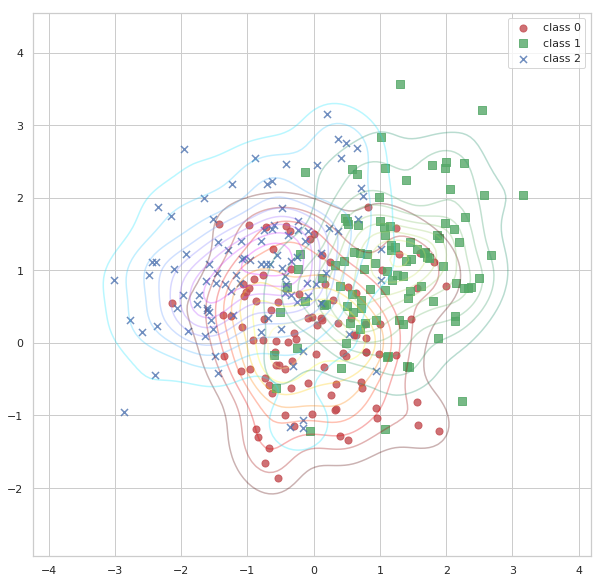

In [33]:
%matplotlib inline

N = 100
np.random.seed(0)
# 각 클래스별 2 dim feature vector
X1 = sp.stats.multivariate_normal([0, 0], [[0.7, 0], [0, 0.7]]).rvs(100)
X2 = sp.stats.multivariate_normal([1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
X3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
X_list = [X1, X2, X3]

# 클래스 1,2,3
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2*np.ones(N)

X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

color = ['r', 'g', 'b']
marker = ['o', 's', 'x']
cmap = [mpl.cm.hot, mpl.cm.summer, mpl.cm.cool]

plt.figure(figsize=(10,10))
for i in range(3):
    plt.scatter(X_list[i][:, 0], X_list[i][:, 1], alpha=0.8, s=50, marker=marker[i], color=color[i], label="class {}".format(i))
    sns.kdeplot(X_list[i][:, 0], X_list[i][:, 1], alpha=0.3, cmap=cmap[i])
plt.legend()
plt.show()

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [35]:
#위에서부터 class=1
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [40]:
# class=1의 covariance
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [41]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [42]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

array([[-5.  , -4.  ],
       [-4.99, -4.  ],
       [-4.98, -4.  ],
       ...,
       [ 4.97,  4.99],
       [ 4.98,  4.99],
       [ 4.99,  4.99]])

In [57]:
XX1.shape

(900, 1000)

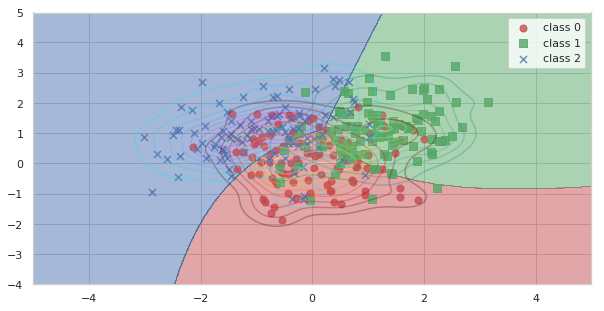

In [68]:
x1min, x1max= -5, 5
x2min, x2max= -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                      np.arange(x2min, x2max, (x1max-x1min)/1000))

#contour

XX = np.array([XX1.ravel(), XX2.ravel()]).T
YY = qda.predict(XX).reshape(XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(['r', 'g', 'b']))

plt.figure(figsize=(10,5))
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)

#scatter
color = ['r', 'g', 'b']
marker = ['o', 's', 'x']
cmap = [mpl.cm.hot, mpl.cm.summer, mpl.cm.cool]


for i in range(3):
    plt.scatter(X_list[i][:, 0], X_list[i][:, 1], alpha=0.8, s=50, marker=marker[i], color=color[i], label="class {}".format(i))
    sns.kdeplot(X_list[i][:, 0], X_list[i][:, 1], alpha=0.3, cmap=cmap[i])
plt.legend()
plt.show()

# 나이브 베이즈 분류 모형

## 1. 가정
- 독립변수간 조건부 독립
- 독립변수 D개 $x=(x_1, \cdots, x_D)$
     - 가능도 likelihood $P(x \mid y=k)$: 모든 $x=(x_1, \cdots, x_D)$에 대한 결합확률(joint probability) $P(x_1, \cdots, x_D \mid y = k)$
     - 나이브 베이즈 분류 모형은 독립변수간 조건부 독립 가정
     - 가능도 갯수: 클래스 k개 x 독립변수 D개
$$P(x_1, \cdots, x_D \mid y = k) = \prod_{d=1}^D P(x_d \mid y=k)$$
- 확률간 크기 비교이므로 분모 필요없음
$$P(y=k \mid x) \propto \prod_{d=1}^D P(x_d \mid y=k)P(y=k)$$